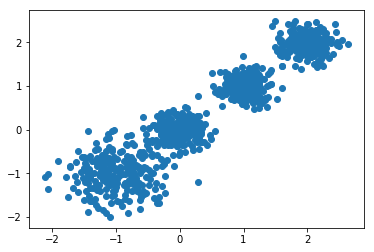

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]], cluster_std=[0.4, 0.2, 0.2, 0.2], 
                  random_state =9)
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

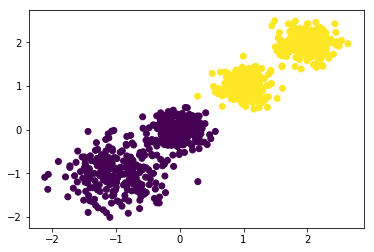

In [2]:
from sklearn.cluster import KMeans
# fit_predict():Compute cluster centers and predict cluster index for each sample.
# 计算聚类中心，返回每一个样本的预测类别索引，是先调用fit(X)再调用predict的快捷形式
y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)

# scatter(样本的横坐标，样本的纵坐标，样本的类别颜色)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [3]:
km = KMeans(n_clusters=4, random_state=9).fit(X)
print('查看质心的坐标')
print(km.cluster_centers_) # 查看质心的坐标
print()
# print(km.cluster_centers_.argsort()[:, ::-1])

print(np.array([[1,3,0],[0,3,1]]))
print()
print(np.argsort(np.array([[1,3,0],[0,3,1]])))
print()
# [:, ::-1]的理解：第一个表示从上到下的列的复制，第二个表示从左到右的行的逆序的复制
# 也可以理解：第一个表示整个数据样本的复制，第二个表示每一个数据样本的逆序复制
# 还可以理解：从左到右表示原数据按'[]'的层次从外到里的复制,先是最外面的[],然后是里层的[],更多层次的依次类推
# 推荐按最后一种方式理解！！！
print(np.argsort(np.array([[1,3,0],[0,3,1]]))[:, ::-1])
print(np.argsort(np.array([[1,3,0],[0,3,1]]))[::-1, ::-1])

查看质心的坐标
[[-0.02515046 -0.02817657]
 [ 1.98478902  1.98174965]
 [-1.02306707 -1.03269656]
 [ 1.01092515  0.98913149]]

[[1 3 0]
 [0 3 1]]

[[2 0 1]
 [0 2 1]]

[[1 0 2]
 [1 2 0]]
[[1 2 0]
 [1 0 2]]


## 方法&属性的解释

In [4]:
km = KMeans(n_clusters=4, random_state=9).fit(X)
print('查看质心的坐标')
print(km.cluster_centers_ ) # 查看质心的坐标
print(km.cluster_centers_.argsort()[:, ::-1])

print('查看每一个样本的类别')
print(km.labels_ )

print('查看每一个样本与其质心的欧式距离的总和')
print(km.inertia_)

new_X = [[1.98478902,2],[0,0],[0,1],[1,1],[2,1]]
# score 目测是用来做交叉验证用的，返回当前样本到其所属类质心距离之和的相反数
# 传递的数据不是测试集！
score = km.score(new_X)
score

查看质心的坐标
[[-0.02515046 -0.02817657]
 [ 1.98478902  1.98174965]
 [-1.02306707 -1.03269656]
 [ 1.01092515  0.98913149]]
[[0 1]
 [0 1]
 [0 1]
 [0 1]]
查看每一个样本的类别
[2 0 3 0 2 1 0 3 2 1 3 1 1 1 0 2 0 2 3 1 2 3 1 0 3 3 3 1 1 3 3 2 2 3 3 3 1
 0 0 2 0 1 1 0 0 0 0 1 0 2 2 0 0 1 0 1 2 0 2 3 3 2 0 0 1 1 1 1 0 1 1 3 2 2
 2 2 2 2 0 3 3 0 3 2 3 0 2 0 1 2 0 0 1 1 1 3 1 2 3 0 0 1 3 2 3 0 3 0 1 1 3
 2 3 1 0 2 2 3 2 3 2 3 1 0 3 3 3 2 3 0 2 2 2 1 1 2 3 0 3 2 0 0 2 3 1 3 0 2
 0 0 0 3 0 1 1 3 0 3 3 0 0 0 1 3 2 0 2 1 2 3 1 2 2 1 1 3 1 0 1 2 1 2 3 0 3
 0 3 3 3 0 3 3 3 0 0 0 0 1 2 0 2 1 0 3 0 1 3 1 1 0 1 0 2 0 0 0 3 3 0 0 1 2
 1 2 0 1 2 1 1 0 2 0 3 2 3 0 3 3 1 0 3 0 0 0 2 1 2 3 1 0 2 2 3 1 3 1 0 2 0
 0 1 2 0 2 3 1 0 2 2 1 2 0 2 1 1 1 3 1 3 3 0 0 2 0 2 1 2 0 3 3 3 0 0 2 2 1
 3 3 1 3 3 3 3 0 0 1 0 0 1 3 1 3 0 3 3 3 3 3 0 0 2 0 3 3 3 1 3 3 1 2 3 3 1
 3 1 2 0 1 0 2 0 0 1 3 2 2 3 0 2 1 0 0 2 3 1 1 0 3 2 3 1 1 2 3 2 3 2 3 3 0
 2 1 1 3 1 0 0 3 1 0 1 1 0 1 0 1 1 2 1 3 2 2 1 0 2 3 3 2 0 0 1 1 1 2 3 2 3
 0 1 3 2 2 0 0 1 2

-1.9881485627052555

In [5]:
print(km.predict(new_X))
# fit_transform() 计算聚类并且返回数据样本-类别矩阵
# 行表示每一个数据样本，列表示聚类的索引，值表示样本与质心的距离，距离最小值即当前数据的索引
print(km.fit_transform(new_X))

[1 0 3 3 1]
[[ 1.11131471  2.81769187  0.          2.22247327]
 [ 1.80277564  0.          2.81769187  1.        ]
 [ 1.5         1.          2.22247327  0.        ]
 [ 0.5         1.41421356  1.40349899  1.        ]
 [ 0.5         2.23606798  1.00011568  2.        ]]


## 聚类分数的评估
- 可以从簇内的稠密程度和簇间的离散程度来评估聚类的效果（需要借助可视化工具）
- 常见的方法有轮廓系数Silhouette Coefficient和Calinski-Harabasz Index
    - ***Calinski-Harabasz Index***
    - Calinski-Harabasz分数值s越大则聚类效果越好
    - Calinski-Harabasz 公式：$s(k) = \frac{tr(B_k)}{tr(W_k)} \frac{m-k}{k-1}$
    - m为训练集样本数，k为类别数。$B_k$为类别之间的协方差矩阵，$W_k$为类别内部数据的协方差矩阵。tr为矩阵的迹（类别内部数据的方差和越小越好，类别之间的方差和越大越好）。
    - ***Silhouette Coefficient***
    - [官方文档：Selecting the number of clusters with silhouette analysis on KMeans clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
    - 轮廓系数范围是[-1, 1]，+1 表示当前样本距离临近的聚类很远，0 表示当前样本距离聚类边界很近，-1 表示样本分类错误。
    - 

***Calinski-Harabasz Index***

In [6]:
from sklearn import metrics
metrics.calinski_harabaz_score(X, y_pred)

3116.1706763322227

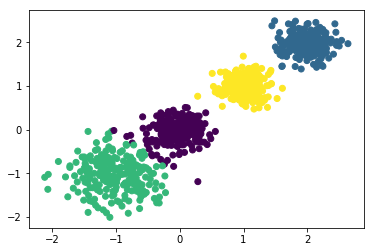

In [7]:
# What about n_clusters=4???
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [8]:
from sklearn import metrics
metrics.calinski_harabaz_score(X, y_pred)

5924.050613480169

In [9]:
from sklearn.cluster import KMeans
clsuter_score = {}
for i in range(2,7):
    y_pred = KMeans(n_clusters=i, random_state=9).fit_predict(X)
    score = metrics.calinski_harabaz_score(X, y_pred)
    clsuter_score[i] = score
clsuter_score
# 聚类为4时分数最高，实际中最佳分类也是4个

{2: 3116.1706763322227,
 3: 2931.625030199556,
 4: 5924.050613480169,
 5: 5401.7625783392168,
 6: 5033.126363807376}

In [10]:
# check fit_predict() VS fit() then pridict()
# judge ndarray is equivalence

# ----

# y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
# print(y_pred)

# y_pred1 = KMeans(n_clusters=2, random_state=9).fit(X)
# rs = y_pred1.predict(X)

# print(y_pred == rs)

***Silhouette Coefficient***

下面的例子计算的是Silhouette Coefficient的平均值，不能完全根据分数的大小来确定最合适的分类，最好的方法还是通过可视化工具，详见[demo](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
for n_clusters in range(2,7):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.643517895365
For n_clusters = 3 The average silhouette_score is : 0.576304040709
For n_clusters = 4 The average silhouette_score is : 0.663454955589
For n_clusters = 5 The average silhouette_score is : 0.6120919016
For n_clusters = 6 The average silhouette_score is : 0.608562190364


In [15]:
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
sample_silhouette_values

array([ 0.483394  ,  0.68820823,  0.77397222,  0.7511008 ,  0.46373995,
        0.7621473 ,  0.50787514,  0.42239067,  0.49828447,  0.81264826,
        0.57543757,  0.79020134,  0.10483669,  0.80402954,  0.60184398,
        0.17314077,  0.75030351,  0.25079529,  0.75120181,  0.75721458,
        0.0068264 ,  0.8014688 ,  0.70021135,  0.3398111 ,  0.56111154,
        0.70529415,  0.64007475,  0.7569998 ,  0.13154556,  0.79627039,
        0.77353505,  0.4075951 ,  0.11110303,  0.67201635,  0.74869461,
        0.7479857 ,  0.81714335,  0.78223147,  0.47178514,  0.50178027,
        0.77900028,  0.79140933,  0.70437793,  0.22323103,  0.0771169 ,
        0.2209126 ,  0.7378047 ,  0.67929663,  0.59173188,  0.35099271,
        0.20066673,  0.50805247,  0.76938953,  0.45142991,  0.55369399,
        0.69687037,  0.54577994,  0.67314606,  0.50788023,  0.66159715,
        0.75620353,  0.37851071,  0.76398411,  0.5417243 ,  0.58887577,
        0.80709613,  0.60367557,  0.81610964,  0.78547006,  0.76

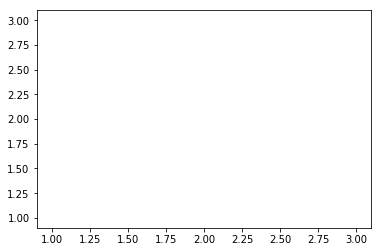

In [19]:
import matplotlib.pyplot as plt
plt.fill_betweenx([1,2,3],[1,2,3],[1,2,3])
plt.show()